## Polynomial Regression -cross validation with sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
auto = pd.read_csv('Auto.csv')
auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
hp = auto.horsepower
mpg = auto.mpg

In [5]:
hp.shape

(392,)

In [6]:
hp1 = hp.values.reshape(-1,1)

In [7]:
hp1.shape

(392, 1)

In [8]:
hp1[:5]

array([[130],
       [165],
       [150],
       [150],
       [140]], dtype=int64)

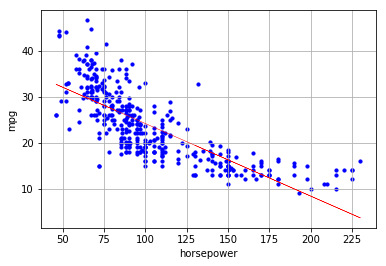

In [11]:
# linear regression
model1 = LinearRegression().fit(hp1,mpg)
yhat   = model1.predict(hp1)

plt.scatter(hp,mpg,c='b',s=10)
plt.plot(hp,yhat,c='r',lw=0.5)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

In [10]:
# degree-two regression

In [ ]:
# get columns

In [13]:
poly2 = PolynomialFeatures(degree=2)
hp2 = poly2.fit_transform(hp1)

In [14]:
hp2[:5]

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       [1.0000e+00, 1.4000e+02, 1.9600e+04]])

In [15]:
np.set_printoptions(suppress=True)

In [16]:
hp2[:5]

array([[    1.,   130., 16900.],
       [    1.,   165., 27225.],
       [    1.,   150., 22500.],
       [    1.,   150., 22500.],
       [    1.,   140., 19600.]])

In [17]:
hp[:5]

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: int64

In [18]:
model2 = LinearRegression().fit(hp2,mpg)
yhat2 = model2.predict(hp2)

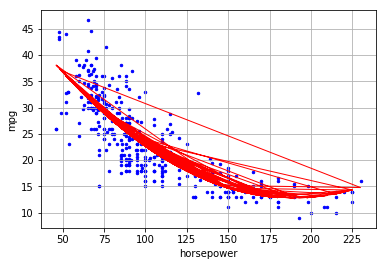

In [19]:
plt.scatter(hp,mpg,c='b',s=6)
plt.plot(hp,yhat2,c='r',lw=1)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

In [20]:
# need to sort dataset -by horsepower

In [21]:
d2 = auto.sort_values('horsepower')

In [22]:
d2[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
101,26.0,4,97.0,46,1950,21.0,73,2,volkswagen super beetle
324,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
323,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
242,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel


In [23]:
mpg = d2.mpg

In [24]:
hp = d2.horsepower
hp1 = hp.values.reshape(-1,1)

In [25]:
poly2 = PolynomialFeatures(degree=2)
hp2 = poly2.fit_transform(hp1)

In [26]:
model2 = LinearRegression().fit(hp2,mpg)
yhat2 = model2.predict(hp2)

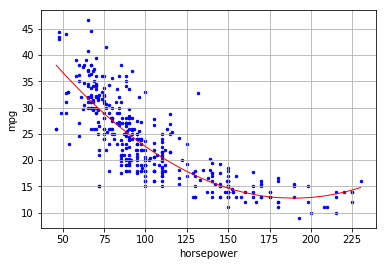

In [27]:
plt.scatter(hp,mpg,c='b',s=6)
plt.plot(hp,yhat2,c='r',lw=1)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

In [25]:
# degree-five regression

In [28]:
poly5 = PolynomialFeatures(degree=5)
hp5 = poly5.fit_transform(hp1)

In [29]:
hp5[:5]

array([[1.00000000e+00, 4.60000000e+01, 2.11600000e+03, 9.73360000e+04,
        4.47745600e+06, 2.05962976e+08],
       [1.00000000e+00, 4.60000000e+01, 2.11600000e+03, 9.73360000e+04,
        4.47745600e+06, 2.05962976e+08],
       [1.00000000e+00, 4.80000000e+01, 2.30400000e+03, 1.10592000e+05,
        5.30841600e+06, 2.54803968e+08],
       [1.00000000e+00, 4.80000000e+01, 2.30400000e+03, 1.10592000e+05,
        5.30841600e+06, 2.54803968e+08],
       [1.00000000e+00, 4.80000000e+01, 2.30400000e+03, 1.10592000e+05,
        5.30841600e+06, 2.54803968e+08]])

In [30]:
df5 = pd.DataFrame(hp5)
df5[:5]

,0,1,2,3,4,5
0,1.0,46.0,2116.0,97336.0,4477456.0,205962976.0
1,1.0,46.0,2116.0,97336.0,4477456.0,205962976.0
2,1.0,48.0,2304.0,110592.0,5308416.0,254803968.0
3,1.0,48.0,2304.0,110592.0,5308416.0,254803968.0
4,1.0,48.0,2304.0,110592.0,5308416.0,254803968.0


In [31]:
model5 = LinearRegression().fit(hp5,mpg)
yhat5 = model5.predict(hp5)

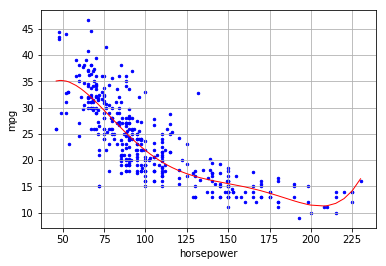

In [33]:
plt.scatter(hp,mpg,c='b',s=6)
plt.plot(hp,yhat5,c='r',lw=1)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

## make_pipeline (many models in a single step)

In [31]:
# see VdP p368

In [34]:
from sklearn.pipeline import make_pipeline

In [35]:
def PolynomialRegression(degree=2):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [36]:
hp = d2.horsepower.values.reshape(-1,1)
mpg = d2.mpg

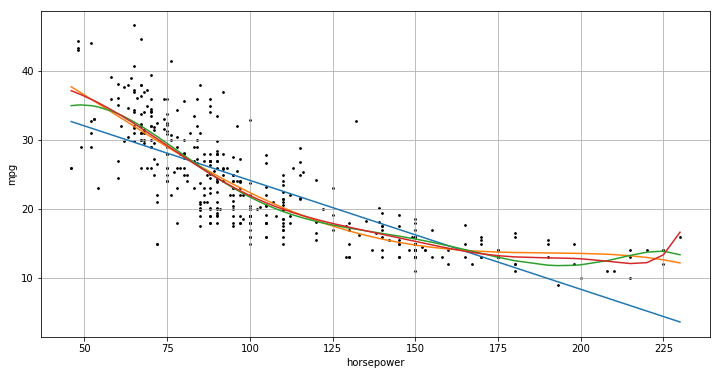

In [39]:
plt.figure(figsize=(12,6))
plt.scatter(hp,mpg,color='k',s = 3)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()

# fit models in a loop

df = pd.DataFrame()
for j in range(1,12,3):
    mod = PolynomialRegression(degree = j).fit(hp,mpg)
    ytest = mod.predict(hp)
    plt.plot(hp,ytest)

## Validation set approach

In [40]:
np.random.seed(9)

In [ ]:
# select train rows

In [41]:
row_train = np.random.choice(391,196,replace=False)
row_train[:5]

array([287, 351, 105,   2, 354])

In [ ]:
# train set

In [42]:
auto_train = auto.loc[row_train]
auto_train[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
287,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw)
351,32.4,4,108.0,75,2350,16.8,81,3,toyota corolla
105,12.0,8,350.0,180,4499,12.5,73,1,oldsmobile vista cruiser
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
354,28.1,4,141.0,80,3230,20.4,81,2,peugeot 505s turbo diesel


In [ ]:
# test set

In [43]:
auto_test = auto.drop(row_train)
auto_test[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
10,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340


In [ ]:
# choose between pandas Series or numpy array

In [59]:
horsepower_train = auto_train['horsepower']

In [60]:
type(horsepower_train)

pandas.core.series.Series

In [44]:
horsepower_train = auto_train['horsepower'].values

In [45]:
type(horsepower_train)

numpy.ndarray

In [46]:
horsepower_train.shape

(196,)

In [47]:
horsepower_train = horsepower_train.reshape(-1,1)
horsepower_train.shape

(196, 1)

In [48]:
horsepower_test = auto_test['horsepower'].values
horsepower_test = horsepower_test.reshape(-1,1)

In [49]:
# train and test response

In [50]:
mpg_train = auto_train['mpg']
mpg_test = auto_test['mpg']

In [89]:
# degree 2

In [51]:
form = PolynomialFeatures(degree=2)
horsepower_train_2 = form.fit_transform(horsepower_train)
horsepower_test_2 = form.fit_transform(horsepower_test)

In [52]:
pd.DataFrame(horsepower_train_2[:5])

,0,1,2
0,1.0,155.0,24025.0
1,1.0,75.0,5625.0
2,1.0,180.0,32400.0
3,1.0,150.0,22500.0
4,1.0,80.0,6400.0


In [69]:
# fit

In [53]:
m2 = LinearRegression().fit(horsepower_train_2,mpg_train)

In [54]:
predictions2 = m2.predict(horsepower_test_2)
predictions2[:5]

array([17.14504764, 13.46673161, 13.35425589, 13.18324667, 13.81071375])

In [ ]:
# mspe

In [55]:
m2_res2 = (predictions2 - mpg_test)**2
m2_mpse = np.mean(m2_res2)
m2_mpse

20.005851783316732

In [73]:
# degree 5

In [56]:
form = PolynomialFeatures(degree=5)
horsepower_train_5 = form.fit_transform(horsepower_train.reshape(-1,1))
horsepower_test_5 = form.fit_transform(horsepower_test.reshape(-1,1))

In [57]:
m5 = LinearRegression().fit(horsepower_train_5,mpg_train)

In [58]:
predictions5 = m5.predict(horsepower_test_5)

In [60]:
m5_res2 = (predictions5 - mpg_test)**2
m5_mpse = np.mean(m5_res2)
m5_mpse

20.360521812763466

In [61]:
# degree 5 mspe larger than degree 2 mspe -overfitting

# Cross-Validation

In [62]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

## Leave-One-Out Cross-Validation (LOOCV)

In [80]:
cv_method = LeaveOneOut()
measure = 'neg_mean_squared_error'

In [81]:
data = auto.copy()

In [82]:
hp = data.horsepower.values.reshape(-1,1)
mpg = data.mpg

In [ ]:
# linear model mspe

In [ ]:
results1 = cross_val_score(LinearRegression(),hp,mpg,cv = cv_method,scoring = measure)
cvmspe1 = results1.mean()
cvmspe1

In [83]:
# quadratic model mspe

-24.231513517929226

In [84]:
form_2 = PolynomialFeatures(degree = 2)
x_2 = form_2.fit_transform(hp)
results2 = cross_val_score(LinearRegression(),x_2,mpg,cv = cv_method,scoring = measure)
cvmspe2 = results2.mean()
cvmspe2

-19.24821312448941

In [ ]:
# loop

In [108]:
cvmspe = []

In [109]:
model = LinearRegression()

In [110]:
for i in range(2,14):
    form = PolynomialFeatures(degree = i)
    x = form.fit_transform(hp)
    results = cross_val_score(model,x,mpg,cv = cv_method,scoring = measure)
    cvmspe.append(results.mean())

In [111]:
cvmspe.insert(0,cvmspe1)     # insert in row 0
cvmspe

[-24.231513517929226,
 -19.24821312448941,
 -19.33498406411397,
 -19.424430309411886,
 -19.033211842978396,
 -18.973012737758705,
 -19.125639655104838,
 -19.22423029373206,
 -19.133856501117357,
 -18.945837436861932,
 -19.1250385409314,
 -24.14841810216805,
 -27.76341869209905]

In [ ]:
# mspe is negative of neg_mean_squared_error

In [112]:
for i in range(len(cvmspe)):
    cvmspe[i] = -cvmspe[i]

In [113]:
cvmspe

[24.231513517929226,
 19.24821312448941,
 19.33498406411397,
 19.424430309411886,
 19.033211842978396,
 18.973012737758705,
 19.125639655104838,
 19.22423029373206,
 19.133856501117357,
 18.945837436861932,
 19.1250385409314,
 24.14841810216805,
 27.76341869209905]

In [124]:
n = len(cvmspe)
n

13

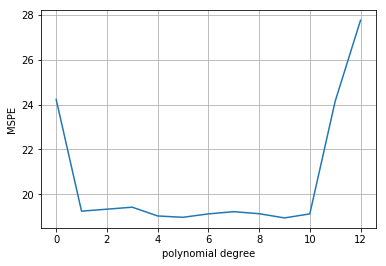

In [126]:
plt.plot(cvmspe)
plt.xlabel('polynomial degree')
plt.ylabel('MSPE')
plt.grid()

In [ ]:
# x-ticks are shifted

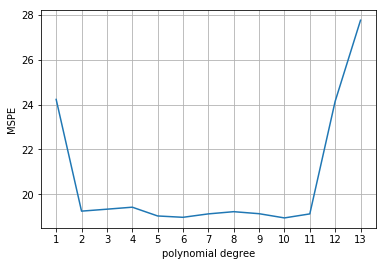

In [130]:
plt.plot(cvmspe)

# shift x-axis
x_range = range(0,n)
y_range = range(1,n+1)
plt.xticks(x_range, y_range)

plt.xlabel('polynomial degree')
plt.ylabel('MSPE')
plt.grid()

In [115]:
# LOOCV best model is polynomial degree 10 (second best is degree 6)

## K-fold Cross validation

In [116]:
from sklearn.model_selection import KFold

In [152]:
m = LinearRegression()

In [133]:
# select 5-fold cross validation

In [153]:
cv_method = KFold(n_splits = 5)

In [154]:
# linear model mspe

In [155]:
results1 = cross_val_score(m,hp,mpg,cv = cv_method,scoring = measure)
cvmspe1 = results1.mean()
cvmspe1

-31.447014088557513

In [156]:
form_2 = PolynomialFeatures(degree = 2)
x_2 = form_2.fit_transform(hp)
results2 = cross_val_score(m,x_2,mpg,cv = cv_method,scoring = measure)
cvmspe2 = results2.mean()
cvmspe2

-24.34715884367356

In [96]:
# loop

In [157]:
cvmspe = []
m = LinearRegression()

In [158]:
for i in range(2,14):
    form = PolynomialFeatures(degree = i)
    x = form.fit_transform(hp)
    results = cross_val_score(m,x,mpg,cv = cv_method,scoring = measure)
    cvmspe.append(results.mean())

In [159]:
cvmspe

[-24.34715884367356,
 -24.34607807898161,
 -24.35538965780616,
 -23.57323974697034,
 -23.407797059555385,
 -23.646448063420337,
 -23.892270279390385,
 -23.918015840113277,
 -23.862407621094167,
 -24.323550189304466,
 -30.101687309472418,
 -34.50104373957487]

In [160]:
cvmspe.insert(0,cvmspe1)
cvmspe

[-31.447014088557513,
 -24.34715884367356,
 -24.34607807898161,
 -24.35538965780616,
 -23.57323974697034,
 -23.407797059555385,
 -23.646448063420337,
 -23.892270279390385,
 -23.918015840113277,
 -23.862407621094167,
 -24.323550189304466,
 -30.101687309472418,
 -34.50104373957487]

In [161]:
aux = -np.asarray(cvmspe)
aux

array([31.44701409, 24.34715884, 24.34607808, 24.35538966, 23.57323975,
       23.40779706, 23.64644806, 23.89227028, 23.91801584, 23.86240762,
       24.32355019, 30.10168731, 34.50104374])

In [162]:
n = len(cvmspe)
n

13

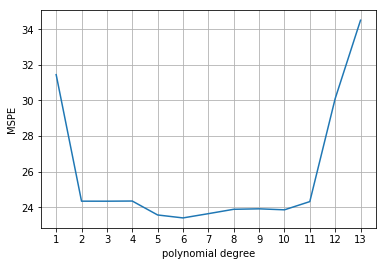

In [163]:
plt.plot(aux)    

# shift x-axis
x_range = range(0,n)
y_range = range(1,n+1)
plt.xticks(x_range, y_range)

plt.xlabel('polynomial degree')
plt.ylabel('MSPE')
plt.grid()

In [ ]:
# 5-fold best model is degree 6

In [ ]:
# VdP p368

In [102]:
from sklearn.model_selection import validation_curve

In [105]:
hp = d2.horsepower.values.reshape(-1,1)
mpg = d2.mpg

In [106]:
degree = np.arange(0,12)

In [109]:
train_mpe, test_mspe = validation_curve(PolynomialRegression(),hp,mpg,
                                        'polynomialfeatures_degree',degree,cv=10)

ValueError: Invalid parameter polynomialfeatures_degree for estimator Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [110]:
train_mpe, test_mspe = validation_curve(PolynomialRegression(),hp,mpg,estimator.get_params().keys(),degree,cv=10)

NameError: name 'estimator' is not defined